# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



# Name-Vibhuti sharma


# Task 1: Prediction using Supervised ML


# The Spark Foundation GRIPFEB21

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# DATA EXPLORATION

In [3]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
s_data.shape

(25, 2)

# VISUALIZATION OF DATA 
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.We can create the plot with the following script: 

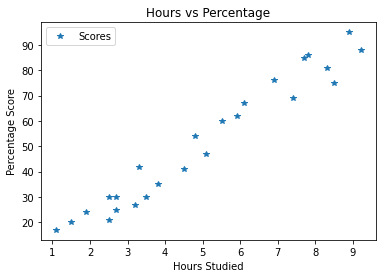

In [6]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above , we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

# Preparing the data 
The next step is to divide data into "attributes" (inputs) and "labels"(outputs).

In [7]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  
print(X[0:5])
print(y[0:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
[21 47 27 75 30]


from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=1)

# Training the algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm 

In [9]:

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


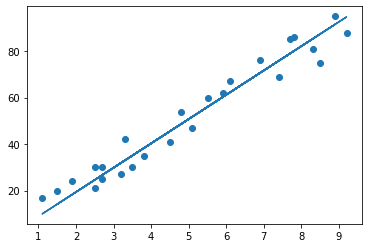

(array([10.46110829]), -1.5369573315500702)

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()
regressor.coef_,regressor.intercept_

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


# Validation Score

In [13]:
print(f'The train score: {regressor.score(X_train,y_train)}')
print(f'The test score: {regressor.score(X_test,y_test)}')

The train score: 0.9637848283990599
The test score: 0.8421031525243527


# Question
What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
# You can also test with your own data
hours = float(input('No of Hours = '))
predicted = regressor.predict([[hours]])
print(" Predicted Score = {} %".format(predicted))

No of Hours = 9.25
 Predicted Score = [95.22829438] %


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 7.882398086270432


In [17]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 68.88092074277635
Root Mean Squared Error: 8.299453038771674
